In [5]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.interpolate import lagrange

# Laboratorio 05: Diferenciación

---
### Profesor: Juan Marcos Marín
### Nombre: ______
*Métodos computacionales 2024-II*

---

#1.
En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de $L$, la primera ley de kirshhoff nos da la siguiente relación

\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde $R$, es la resistencia del ciruito, $I$ es la corriente. Suponga que medimos la corriente con varios valores de $t$ y obtenemos:

``t = 1.00, 1.01, 1.02, 1.03, 1.04``

``i = 3.10, 3.12, 3.14, 3.18, 3.24``


donde $t$ se mide en segundos, $I$ se da en Amperios, la inductancia $L= 0.98$ H, la resistencia es de 0.142 $\Omega$. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente
- Emplee el metodo de diferencias finitas y de tres puntos para calcular la derivada numérica.
- Ahora, encuentre un polinomio de interpolación usando alguno de los métodos vistos y calcule la derivada 'exacta'. Compare sus resultados.

In [6]:

t = np.array([1.00, 1.01, 1.02, 1.03, 1.04])
i = np.array([3.10, 3.12, 3.14, 3.18, 3.24])

L = 0.98
R = 0.142


di_dt = np.gradient(i, t)

epsilon_temp = L * di_dt + R * i


df = pd.DataFrame({'Tiempo (s)': t, 'Corriente (A)': i, 'di/dt (A/s)': di_dt, 'Voltaje (V)': epsilon_temp})

print(df)


   Tiempo (s)  Corriente (A)  di/dt (A/s)  Voltaje (V)
0        1.00           3.10          2.0      2.40020
1        1.01           3.12          2.0      2.40304
2        1.02           3.14          3.0      3.38588
3        1.03           3.18          5.0      5.35156
4        1.04           3.24          6.0      6.34008


In [11]:
poly_lg = lagrange(t,i)
x=np.linspace(1.00,1.04,100)

In [13]:
def tp(f, x, h):

    n = len(x)
    derivative = np.zeros_like(x)

    for i in range(n):
        if i == 0:

            derivative[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:

            derivative[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:

            derivative[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

    return derivative


In [14]:

derivada_tres_puntos = tp(poly_lg, x, h=0.01)
print(derivada_tres_puntos)

[1.99999988 3.83570894 3.67944851 3.53108669 3.39049154 3.25753115
 3.1320736  3.01398698 2.90313936 2.79939883 2.70263346 2.61271135
 2.52950058 2.45286922 2.38268535 2.31881707 2.26113244 2.20949956
 2.1637865  2.12386135 2.08959219 2.0608471  2.03749416 2.01940145
 2.00643707 1.99846907 1.99536557 1.99699462 2.00322431 2.01392273
 2.02895796 2.04819808 2.07151117 2.0987653  2.12982858 2.16456908
 2.20285487 2.24455405 2.28953468 2.33766486 2.38881267 2.44284619
 2.49963349 2.55904267 2.62094181 2.68519898 2.75168226 2.82025975
 2.89079951 2.96316965 3.03723823 3.11287333 3.18994305 3.26831545
 3.34785863 3.42844066 3.50992963 3.59219362 3.67510071 3.75851898
 3.84231652 3.9263614  4.01052171 4.09466554 4.17866095 4.26237604
 4.34567889 4.42843757 4.51052017 4.59179478 4.67212946 4.75139231
 4.82945141 4.90617484 4.98143068 5.05508702 5.12701193 5.19707349
 5.26513979 5.33107892 5.39475894 5.45604796 5.51481404 5.57092526
 5.62424972 5.67465549 5.72201065 5.76618329 5.80704148 5.8444

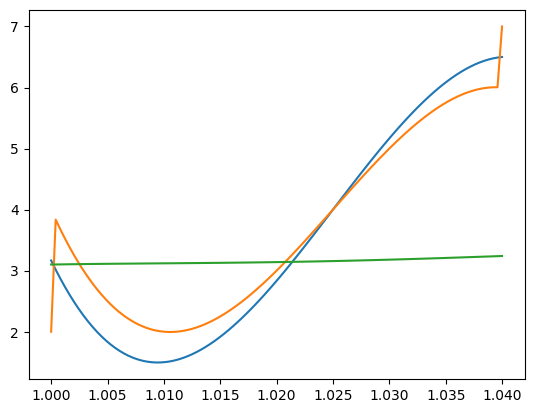

In [16]:
derivada_exacta=poly_lg.deriv()
plt.plot(x,derivada_exacta(x))
plt.plot(x,derivada_tres_puntos,'-')
plt.plot(x,poly_lg(x),)


# 2.

Usando la siguiente tabla, determinar la velocidad instantanea para cada uno de los tiempo y distancias mostrados.

* ¿Cuál será la velocidad para $t=12$?

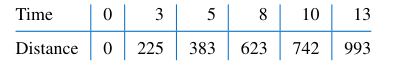



In [17]:
tiempo=np.array([0,3,5,8,10,13])
distancia=np.array([0,225,385,623,742,993])

velocidad=np.gradient(distancia,tiempo)
print(velocidad)

velocidad_interpol=lagrange(t,velocidad)
velocidad_interpol(12)

[75.         78.         79.73333333 67.43333333 69.16666667 83.66666667]


2474613699480.8237

# 3.

Para un cohete, se recabaron los datos siguientes de la distancia
recorrida $y$ versus el tiempo $t$:

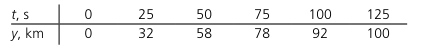

Use diferenciación numérica para estimar la velocidad y aceleración
del cohete en cada momento.

velocidad
[ 9.    7.7   7.96  7.14  7.4  10.04]
aceleración
[-0.052  -0.0208 -0.0112 -0.0112  0.058   0.1056]


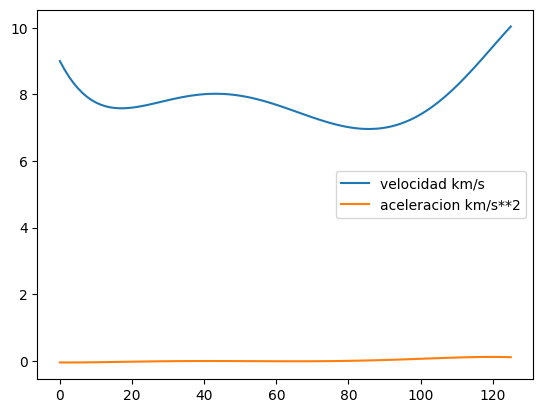

In [21]:
tiempo=np.array([0,25,50,75,100,125])
distanci=np.array([0,32,58,78,92,100])

x=np.linspace(0,125,100)

velocidad=np.gradient(distancia,tiempo)

velocidad_interpol=lagrange(tiempo,velocidad)

aceleracion=np.gradient(velocidad,tiempo)
aceleracion_interpol=lagrange(tiempo,aceleracion)
print("velocidad")
print(velocidad)
print("aceleración")
print(aceleracion)
plt.plot(x,velocidad_interpol(x),label='velocidad km/s')
plt.plot(x,aceleracion_interpol(x),label='aceleracion km/s**2')
plt.legend()
plt.show()

#4.
El potencial eléctrico de un anillo de radio $R$, en su parte superior $z$ viene dado por:


\begin{equation}
V = \frac{kq_{tot}}{\sqrt{z^2+R^2}}
\end{equation}

Calcule el campo eléctrico para $z>0$ y $R=0.1$ mm. Reescale el problema en unidades de $kq_{tot}$ empleando:

**a.** La librearia sympy.

**b.** Calcular el campo en el punto  $z = 0.1$ mm empleando el metodo np.grad

**c.** Calcular el campo para diferentes valores de $z$ con $z>0$,  empleando np.grad Construya un gráfico de $E$ vs $z$.

---
Recuerde que la componente $z$ del campo electrico esta dado por:

\begin{equation}
E_z = - \frac{\partial V}{\partial z}
\end{equation}

In [33]:

R=0.1
z,k,Q_tot=sp.symbols('z,k,Q_tot')


v=k*Q_tot/sp.sqrt(z**2+R**2)

E=-sp.diff(v,z)
print(E)

Q_tot*k*z/(z**2 + 0.01)**(3/2)


In [34]:
v_num=sp.lambdify((z,k,Q_tot),v,'numpy')
v_num(0.1,9e9,10)
print(f"el campo es de {v_num(0.1,9e9,10)} N/C")






el campo es de 636396103067.8927 N/C


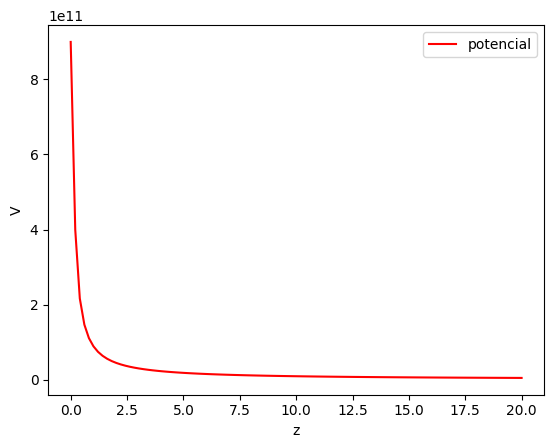

In [42]:
z=np.linspace(0,20,100)
plt.plot(z,v_num(z,9e9,10),label='potencial', color='red')
plt.xlabel('z')
plt.ylabel('V')
plt.legend()
plt.show()